### Importing Libraries

# The following code imports essential libraries for data manipulation, numerical operations, and visualization.


# This notebook analyzes the relationship between social media usage and mental health using data science techniques. It includes data preprocessing, exploratory data analysis, visualization, and machine learning models to identify patterns and correlations between social media habits and mental health indicators.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the dataset

In [2]:
df=pd.read_csv("smmh.csv")


Displaying the first few rows of the dataframe to get an overview of the data


In [3]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1



# The following code provides a concise summary of the DataFrame, including the number of non-null entries and the data type of each column.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   Timestamp                                                                                                             481 non-null    object 
 1   1. What is your age?                                                                                                  481 non-null    float64
 2   2. Gender                                                                                                             481 non-null    object 
 3   3. Relationship Status                                                                                                481 non-null    object 
 4   4. Occup

# # The following code calculates the number of missing values in each column of the DataFrame.


In [5]:
df.isnull().sum()


Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

# The following code filters out rows where the  column has null values.


In [6]:
df = df[df["5. What type of organizations are you affiliated with?"].notnull()]


# The following code calculates the number of missing values in each column of the DataFrame.


In [7]:
df.isnull().sum()


Timestamp                                                                                                               0
1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
5. What type of organizations are you affiliated with?                                                                  0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average t

# The following code drops the  column from the DataFrame.


In [8]:
df=df.drop(columns=["Timestamp"])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   1. What is your age?                                                                                                  451 non-null    float64
 1   2. Gender                                                                                                             451 non-null    object 
 2   3. Relationship Status                                                                                                451 non-null    object 
 3   4. Occupation Status                                                                                                  451 non-null    object 
 4   5. What type 

# # This section of the code renames the columns of the DataFrame to more concise and readable names.



In [10]:
column_names = {
    "1. What is your age?": "Age",
    "2. Gender": "Gender",
    "3. Relationship Status": "Relationship_Status",
    "4. Occupation Status": "Occupation_Status",
    "5. What type of organizations are you affiliated with?": "Affiliation_Type",
    "6. Do you use social media?": "Uses_Social_Media",
    "7. What social media platforms do you commonly use?": "Common_Platforms",
    "8. What is the average time you spend on social media every day?": "Daily_SM_Usage",
    "9. How often do you find yourself using Social media without a specific purpose?": "SM_Usage_Without_Purpose",
    "10. How often do you get distracted by Social media when you are busy doing something?": "SM_Distraction",
    "11. Do you feel restless if you haven't used Social media in a while?": "Restless_Without_SM",
    "12. On a scale of 1 to 5, how easily distracted are you?": "Easily_Distracted",
    "13. On a scale of 1 to 5, how much are you bothered by worries?": "Bothered_By_Worries",
    "14. Do you find it difficult to concentrate on things?": "Difficulty_Concentrating",
    "15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?": "Comparison_On_SM",
    "16. Following the previous question, how do you feel about these comparisons, generally speaking?": "Feelings_About_Comparison",
    "17. How often do you look to seek validation from features of social media?": "Seeking_Validation_SM",
    "18. How often do you feel depressed or down?": "Depression_Frequency",
    "19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?": "Interest_Fluctuation",
    "20. On a scale of 1 to 5, how often do you face issues regarding sleep?": "Sleep_Issues"
}

df.rename(columns=column_names, inplace=True)

df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 0 to 480
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        451 non-null    float64
 1   Gender                     451 non-null    object 
 2   Relationship_Status        451 non-null    object 
 3   Occupation_Status          451 non-null    object 
 4   Affiliation_Type           451 non-null    object 
 5   Uses_Social_Media          451 non-null    object 
 6   Common_Platforms           451 non-null    object 
 7   Daily_SM_Usage             451 non-null    object 
 8   SM_Usage_Without_Purpose   451 non-null    int64  
 9   SM_Distraction             451 non-null    int64  
 10  Restless_Without_SM        451 non-null    int64  
 11  Easily_Distracted          451 non-null    int64  
 12  Bothered_By_Worries        451 non-null    int64  
 13  Difficulty_Concentrating   451 non-null    int64  
 14 

# This section of the code imports the necessary libraries for data visualization to find out the outliers



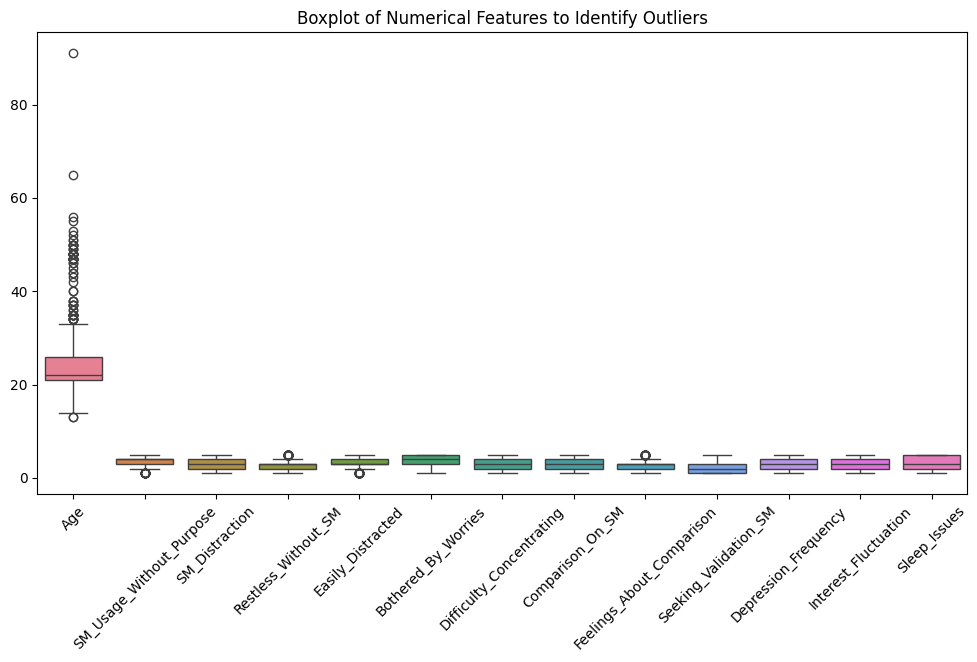

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing outliers using boxplot for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot of Numerical Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()


# This section of the code performs One Hot Encoding on categorical variables in the dataset.
# One Hot Encoding converts categorical variables into a form that could be provided to machine learning algorithms to improve predictions.
# The process creates binary columns for each category in the categorical variables, which helps in:
# 1. Avoiding ordinal relationships between categories
# 2. Making the model more interpretable
# 3. Improving model performance for certain algorithms that require numerical input


In [12]:
# Perform One Hot Encoding for categorical columns
# First, identify categorical columns that need encoding
categorical_columns = [
    'Gender', 'Relationship_Status', 'Occupation_Status', 'Affiliation_Type',
    'Uses_Social_Media', 'Common_Platforms', 'Daily_SM_Usage'
]

# Create a copy of the dataframe before encoding
df_encoded = df.copy()

# Apply one-hot encoding using pandas get_dummies
for column in categorical_columns:
    if column in df_encoded.columns:
        # Create dummies and drop the original column
        dummies = pd.get_dummies(df_encoded[column], prefix=column, drop_first=False)
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        df_encoded.drop(column, axis=1, inplace=True)

# Display the shape of the dataframe before and after encoding
print(f"Original dataframe shape: {df.shape}")
print(f"Encoded dataframe shape: {df_encoded.shape}")

# Display the first few rows of the encoded dataframe
df_encoded.head()


Original dataframe shape: (451, 20)
Encoded dataframe shape: (451, 175)


,Age,SM_Usage_Without_Purpose,SM_Distraction,Restless_Without_SM,Easily_Distracted,Bothered_By_Worries,Difficulty_Concentrating,Comparison_On_SM,Feelings_About_Comparison,Seeking_Validation_SM,...,"Common_Platforms_YouTube, Pinterest","Common_Platforms_YouTube, Reddit","Common_Platforms_YouTube, Snapchat, Discord","Common_Platforms_YouTube, Snapchat, Discord, Reddit",Daily_SM_Usage_Between 1 and 2 hours,Daily_SM_Usage_Between 2 and 3 hours,Daily_SM_Usage_Between 3 and 4 hours,Daily_SM_Usage_Between 4 and 5 hours,Daily_SM_Usage_Less than an Hour,Daily_SM_Usage_More than 5 hours
0,21.0,5,3,2,5,2,5,2,3,2,...,False,False,False,False,False,True,False,False,False,False
1,21.0,4,3,2,4,5,4,5,1,1,...,False,False,False,False,False,False,False,False,False,True
2,21.0,3,2,1,2,5,4,3,3,1,...,False,False,False,False,False,False,True,False,False,False
3,21.0,4,2,1,3,5,3,5,1,2,...,False,False,False,False,False,False,False,False,False,True
4,21.0,3,5,4,4,5,5,3,3,3,...,False,False,False,False,False,True,False,False,False,False


# This file contains code for analyzing and processing data related to social media addiction and mental health.


In [13]:
df=df_encoded


In [14]:
df

,Age,SM_Usage_Without_Purpose,SM_Distraction,Restless_Without_SM,Easily_Distracted,Bothered_By_Worries,Difficulty_Concentrating,Comparison_On_SM,Feelings_About_Comparison,Seeking_Validation_SM,...,"Common_Platforms_YouTube, Pinterest","Common_Platforms_YouTube, Reddit","Common_Platforms_YouTube, Snapchat, Discord","Common_Platforms_YouTube, Snapchat, Discord, Reddit",Daily_SM_Usage_Between 1 and 2 hours,Daily_SM_Usage_Between 2 and 3 hours,Daily_SM_Usage_Between 3 and 4 hours,Daily_SM_Usage_Between 4 and 5 hours,Daily_SM_Usage_Less than an Hour,Daily_SM_Usage_More than 5 hours
0,21.0,5,3,2,5,2,5,2,3,2,...,False,False,False,False,False,True,False,False,False,False
1,21.0,4,3,2,4,5,4,5,1,1,...,False,False,False,False,False,False,False,False,False,True
2,21.0,3,2,1,2,5,4,3,3,1,...,False,False,False,False,False,False,True,False,False,False
3,21.0,4,2,1,3,5,3,5,1,2,...,False,False,False,False,False,False,False,False,False,True
4,21.0,3,5,4,4,5,5,3,3,3,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,24.0,3,4,3,4,3,4,4,2,4,...,False,False,False,False,False,True,False,False,False,False
477,26.0,2,1,2,3,4,4,4,2,4,...,False,False,False,False,True,False,False,False,False,False
478,29.0,3,3,4,3,2,3,3,3,4,...,False,False,False,False,False,True,False,False,False,False
479,21.0,2,3,2,3,3,2,2,3,4,...,False,False,False,False,False,True,False,False,False,False


In [15]:
df.isnull().sum()


Age                                     0
SM_Usage_Without_Purpose                0
SM_Distraction                          0
Restless_Without_SM                     0
Easily_Distracted                       0
                                       ..
Daily_SM_Usage_Between 2 and 3 hours    0
Daily_SM_Usage_Between 3 and 4 hours    0
Daily_SM_Usage_Between 4 and 5 hours    0
Daily_SM_Usage_Less than an Hour        0
Daily_SM_Usage_More than 5 hours        0
Length: 175, dtype: int64


# Data Preprocessing and Feature Engineering
# This section focuses on converting boolean values to numerical format (0/1)
# to prepare the data for machine learning models. Boolean columns are identified
# and converted to integers, which makes them suitable for mathematical operations
# and model training. This step is essential for ensuring all data is in a numeric
# format that can be processed by machine learning algorithms.


In [16]:
# Convert boolean data values to numerical values
# This will convert True to 1 and False to 0

# First, identify boolean columns
bool_columns = df.select_dtypes(include=['bool']).columns

# Display the number of boolean columns found
print(f"Number of boolean columns found: {len(bool_columns)}")

# Convert boolean columns to integers (True becomes 1, False becomes 0)
for column in bool_columns:
    df[column] = df[column].astype(int)

# Verify the conversion by checking data types
print("\nData types after conversion:")
print(df.dtypes.value_counts())

# Display a sample of the converted data
print("\nSample of data after boolean conversion:")
print(df.head(3))


Number of boolean columns found: 162

Data types after conversion:
int64      174
float64      1
Name: count, dtype: int64

Sample of data after boolean conversion:
    Age  SM_Usage_Without_Purpose  SM_Distraction  Restless_Without_SM  \
0  21.0                         5               3                    2   
1  21.0                         4               3                    2   
2  21.0                         3               2                    1   

   Easily_Distracted  Bothered_By_Worries  Difficulty_Concentrating  \
0                  5                    2                         5   
1                  4                    5                         4   
2                  2                    5                         4   

   Comparison_On_SM  Feelings_About_Comparison  Seeking_Validation_SM  ...  \
0                 2                          3                      2  ...   
1                 5                          1                      1  ...   
2                 3

# Mental Health Status Classification
# 
# This section focuses on creating a mental health status classification based on various psychological and behavioral indicators.
# We define a set of mental health features including worry levels, concentration difficulties, depression symptoms, 
# social media usage patterns, and validation-seeking behaviors.
# 
# The classification system categorizes individuals into five mental health status levels:
# - Mild: Average score ≤ 1.5
# - Minimal Moderate: Average score between 1.5 and 2.5
# - Moderate: Average score between 2.5 and 3.5
# - Severe: Average score between 3.5 and 4.5
# - Extremely Severe: Average score > 4.5
# 
# This classification will help identify individuals who may be experiencing mental health issues
# related to social media usage and provide insights for targeted interventions.



Distribution of Mental Status categories:
Mental_Status
Moderate            181
Severe              161
Minimal Moderate     72
Mild                 19
Extremely Severe     18
Name: count, dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11876\3468465011.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Mental_Status'] = df.apply(calculate_mental_status, axis=1)


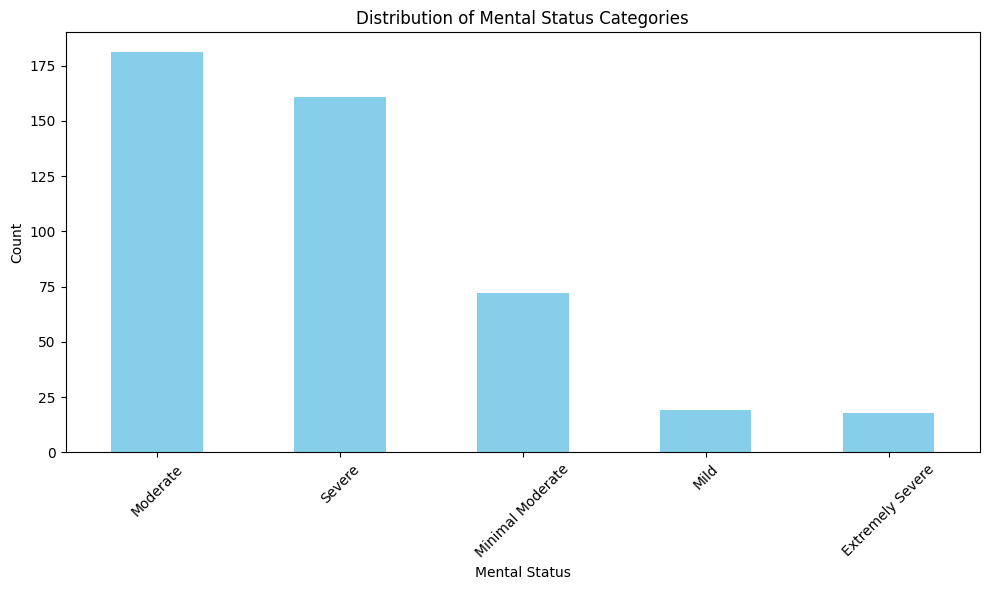


Correlation between Mental_Status and key features:
- Bothered_By_Worries: 0.6311
- Difficulty_Concentrating: 0.7289
- Interest_Fluctuation: 0.6665
- Sleep_Issues: 0.5377
- SM_Usage_Without_Purpose: 0.5917
- SM_Distraction: 0.6954
- Restless_Without_SM: 0.6302
- Easily_Distracted: 0.7466


C:\Users\User\AppData\Local\Temp\ipykernel_11876\3468465011.py:71: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Mental_Status_Numeric'] = df['Mental_Status'].map(status_mapping)


In [17]:
# Feature Engineering: Create Mental Status column based on relevant features

# Define the features that contribute to mental status assessment
mental_health_features = [
    'Bothered_By_Worries', 
    'Difficulty_Concentrating', 
    'Depressed_Or_Down', 
    'Interest_Fluctuation', 
    'Sleep_Issues',
    'SM_Usage_Without_Purpose',
    'SM_Distraction',
    'Restless_Without_SM',
    'Easily_Distracted',
    'Social_Media_Comparison',
    'Negative_Comparison_Feelings',
    'Validation_Seeking'
]

# Create a function to calculate mental status score
def calculate_mental_status(row):
    # Extract relevant features that exist in the dataframe
    valid_features = [f for f in mental_health_features if f in row.index]
    
    if not valid_features:
        return "Unknown"  # No relevant features found
    
    # Calculate the average score from available features
    total_score = sum(row[feature] for feature in valid_features)
    avg_score = total_score / len(valid_features)
    
    # Classify based on average score
    if avg_score <= 1.5:
        return "Mild"
    elif avg_score <= 2.5:
        return "Minimal Moderate"
    elif avg_score <= 3.5:
        return "Moderate"
    elif avg_score <= 4.5:
        return "Severe"
    else:
        return "Extremely Severe"

# Apply the function to create the new column
df['Mental_Status'] = df.apply(calculate_mental_status, axis=1)

# Display the distribution of mental status categories
mental_status_counts = df['Mental_Status'].value_counts()
print("\nDistribution of Mental Status categories:")
print(mental_status_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
mental_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Mental Status Categories')
plt.xlabel('Mental Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check correlation between Mental_Status and other key features
print("\nCorrelation between Mental_Status and key features:")
# Convert Mental_Status to numeric for correlation analysis
status_mapping = {
    'Mild': 1, 
    'Minimal Moderate': 2, 
    'Moderate': 3, 
    'Severe': 4, 
    'Extremely Severe': 5
}
df['Mental_Status_Numeric'] = df['Mental_Status'].map(status_mapping)

# Calculate correlations with key features
for feature in [f for f in mental_health_features if f in df.columns]:
    correlation = df['Mental_Status_Numeric'].corr(df[feature])
    print(f"- {feature}: {correlation:.4f}")


# Feature Correlation Analysis with Mental Health Status
# 
# This section analyzes the correlation between various features and the mental health status of respondents.
# We calculate the correlation coefficient between each feature and the Mental_Status_Numeric variable,
# which represents the severity of mental health issues on a scale from 1 (Mild) to 5 (Extremely Severe).
# 
# The visualization shows the top 15 features that have the strongest correlation (positive or negative)
# with mental health status, helping us identify which factors might be most associated with
# mental health outcomes in relation to social media usage.


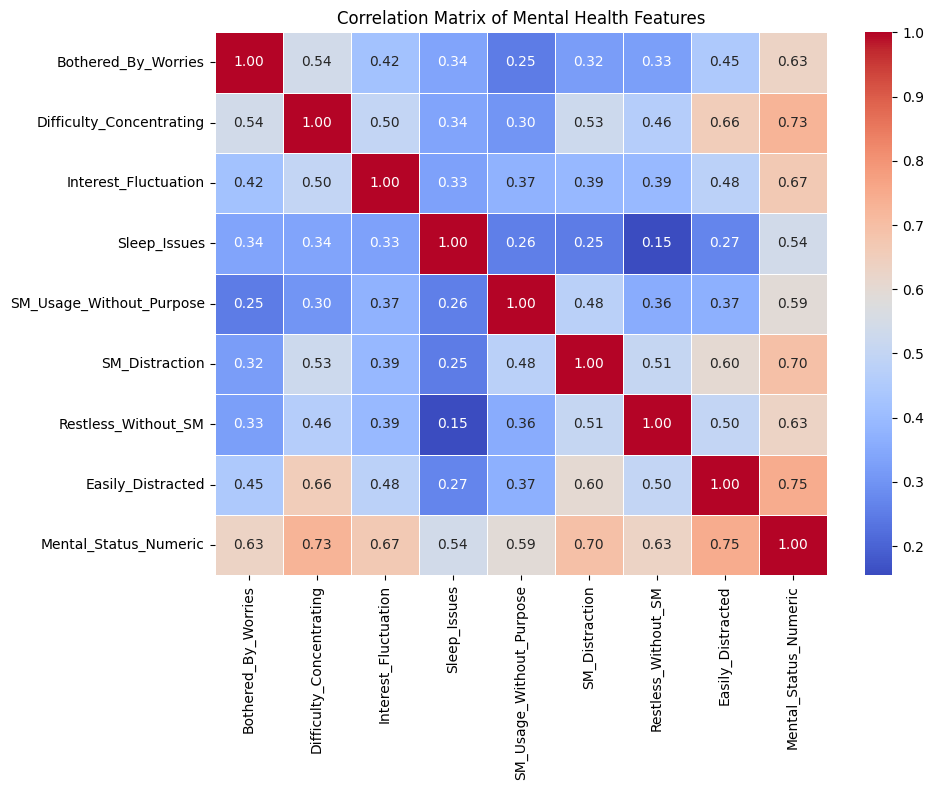


Correlation Matrix of Mental Health Features:
                          Bothered_By_Worries  Difficulty_Concentrating  \
Bothered_By_Worries                  1.000000                  0.540836   
Difficulty_Concentrating             0.540836                  1.000000   
Interest_Fluctuation                 0.419401                  0.499556   
Sleep_Issues                         0.339097                  0.336861   
SM_Usage_Without_Purpose             0.248716                  0.302374   
SM_Distraction                       0.322820                  0.526665   
Restless_Without_SM                  0.325070                  0.463033   
Easily_Distracted                    0.446733                  0.655693   
Mental_Status_Numeric                0.631071                  0.728933   

                          Interest_Fluctuation  Sleep_Issues  \
Bothered_By_Worries                   0.419401      0.339097   
Difficulty_Concentrating              0.499556      0.336861   
Interest_F

In [18]:
# Create a correlation matrix for key features related to mental health
# Get the list of features that actually exist in the dataframe
available_features = [f for f in mental_health_features if f in df.columns]
correlation_features = available_features + ['Mental_Status_Numeric']

# Create the correlation matrix with only available features
correlation_matrix = df[correlation_features].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Mental Health Features')
plt.tight_layout()
plt.show()

# Display the correlation matrix
print("\nCorrelation Matrix of Mental Health Features:")
print(correlation_matrix)



Correlations with Mental Status (sorted by absolute value):
                                               Feature  Correlation
4                                    Easily_Distracted     0.746646
6                             Difficulty_Concentrating     0.728933
2                                       SM_Distraction     0.695376
11                                Interest_Fluctuation     0.666530
5                                  Bothered_By_Worries     0.631071
..                                                 ...          ...
107  Common_Platforms_Facebook, Twitter, Instagram,...     0.006010
36                 Affiliation_Type_School, University     0.004655
92   Common_Platforms_Facebook, Twitter, Instagram,...     0.004259
26                    Occupation_Status_School Student    -0.004056
68   Common_Platforms_Facebook, Instagram, YouTube,...     0.001464

[175 rows x 2 columns]


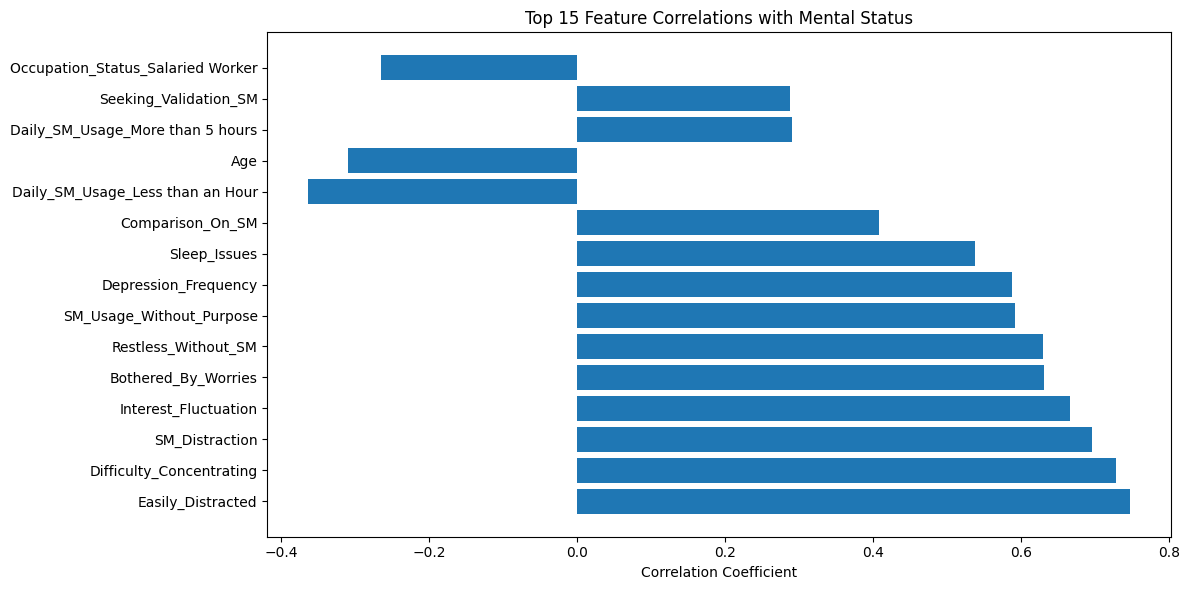

In [19]:
# Calculate correlations between Mental_Status_Numeric and all other features
correlations = {}
for column in df.columns:
    if column not in ['Mental_Status', 'Mental_Status_Numeric']:
        try:
            corr = df['Mental_Status_Numeric'].corr(df[column])
            if not pd.isna(corr):  # Only include non-NaN correlations
                correlations[column] = corr
        except:
            continue

# Convert to DataFrame and sort by absolute correlation value
corr_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
corr_df = corr_df.drop('Abs_Correlation', axis=1)

# Display top correlations
print("\nCorrelations with Mental Status (sorted by absolute value):")
print(corr_df)

# Visualize top 15 correlations
plt.figure(figsize=(12, 6))
top_15 = corr_df.head(15)
plt.barh(top_15['Feature'], top_15['Correlation'])
plt.title('Top 15 Feature Correlations with Mental Status')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()




# In this section, we build a predictive model to classify mental health status based on the features we've analyzed.
# 
# We:
# 1. Prepare our features (X) and target variable (y)
# 2. Split the data into training (80%) and testing (20%) sets
# 3. Train a Random Forest Classifier on the data
# 4. Evaluate model performance using classification metrics and confusion matrix
# 5. Analyze feature importance to understand which factors most strongly predict mental health outcomes
# 
# This model helps us understand the predictive relationship between social media usage patterns and mental health status.


In [20]:
# Prepare features and target
X = df.drop(['Mental_Status', 'Mental_Status_Numeric'], axis=1)
y = df['Mental_Status_Numeric']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (360, 175)
Testing set shape: (91, 175)


# Random Forest Classifier for Mental Health Status Prediction
# 
# In this section, we implement a Random Forest Classifier to predict mental health status based on our features.
# 
# The model:
# 1. Uses 100 decision trees (n_estimators=100)
# 2. Maintains reproducibility with random_state=42
# 3. Is trained on 80% of our data and tested on the remaining 20%
# 
# We evaluate the model using:
# - Classification report (precision, recall, f1-score)
# - Confusion matrix visualization
# - Feature importance analysis to identify the most predictive factors
#
# This helps us understand which social media usage patterns and behaviors are most strongly associated with different mental health outcomes.



Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.75      0.43      0.55         7
           3       0.85      0.98      0.91        42
           4       0.94      0.91      0.93        34
           5       1.00      0.67      0.80         3

    accuracy                           0.89        91
   macro avg       0.91      0.76      0.81        91
weighted avg       0.89      0.89      0.88        91



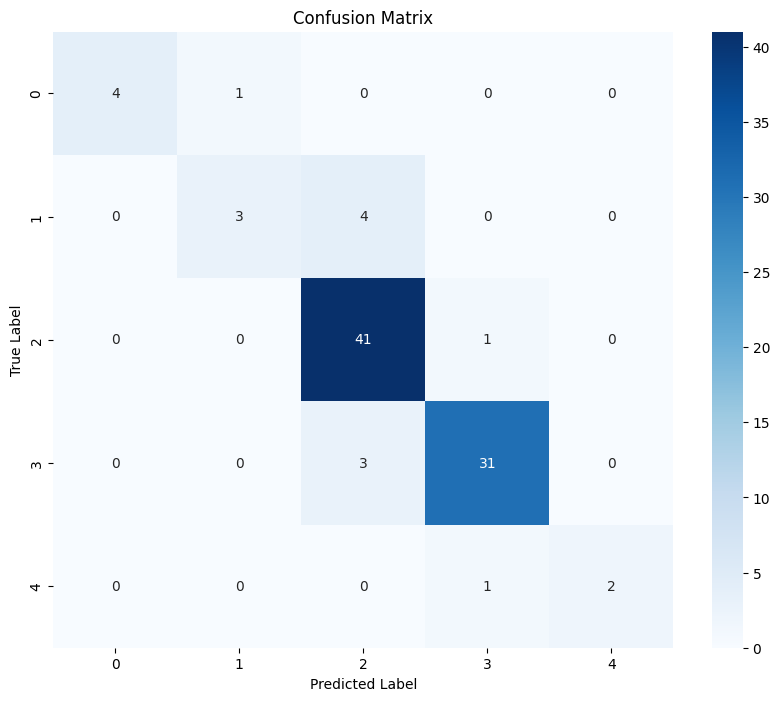

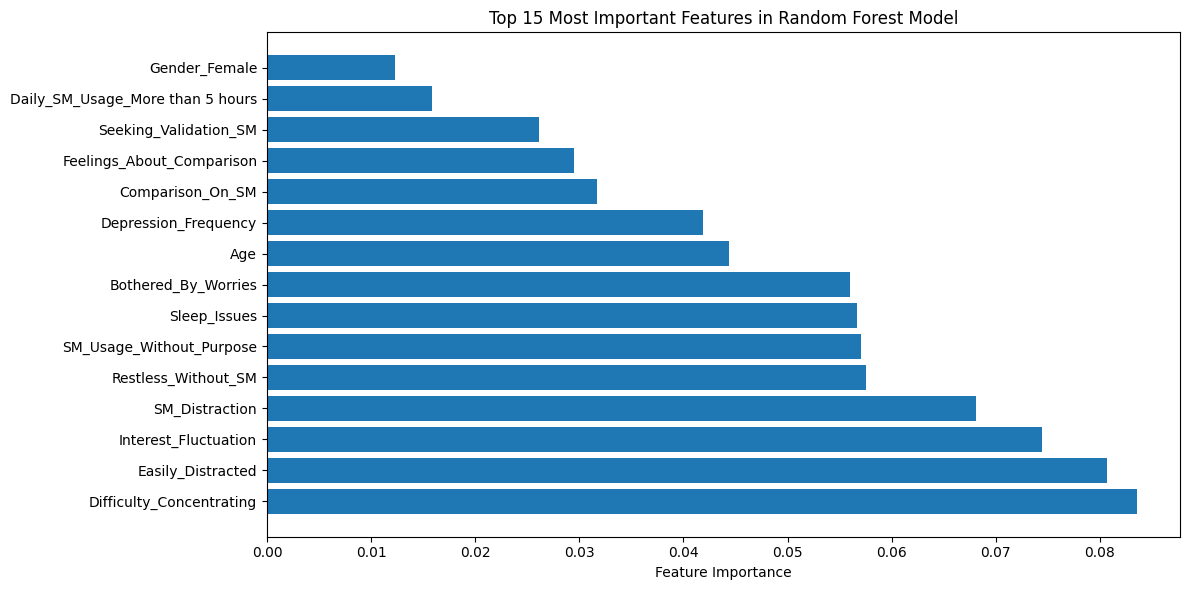

In [21]:
# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=44)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print model performance metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.title('Top 15 Most Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


# Decision Tree Classifier Analysis
# 
# Decision trees are a non-parametric supervised learning method used for classification and regression. The model creates a tree-like structure of decisions based on feature values to predict the target variable. Decision trees are easy to interpret and can handle both numerical and categorical data.
# 
# In this section, we'll train a Decision Tree model to predict mental health status based on social media usage patterns and analyze which features are most important for the classification. Decision trees can capture non-linear relationships and feature interactions that might be missed by simpler models.



Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.50      0.43      0.46         7
           3       0.79      0.74      0.77        42
           4       0.75      0.88      0.81        34
           5       1.00      0.67      0.80         3

    accuracy                           0.77        91
   macro avg       0.81      0.70      0.75        91
weighted avg       0.77      0.77      0.77        91



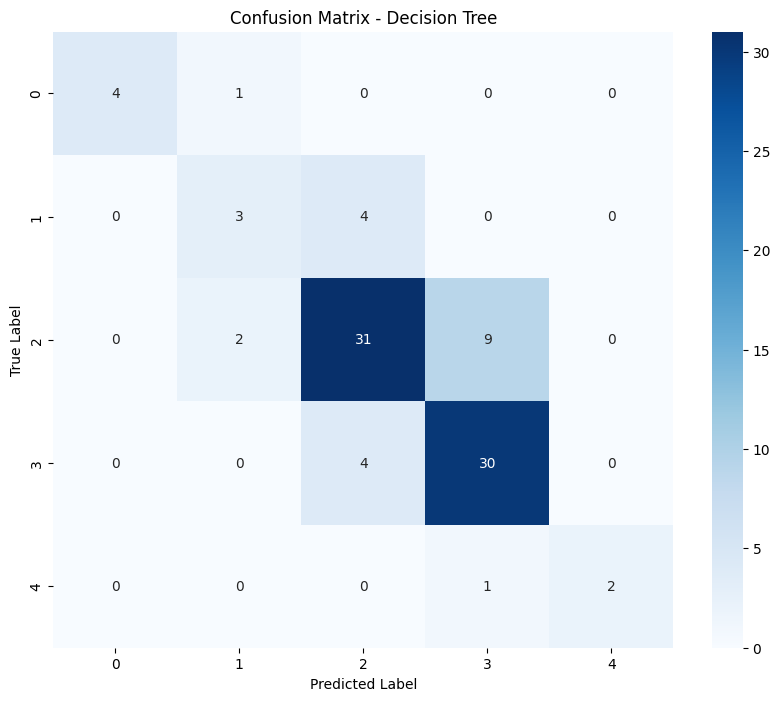

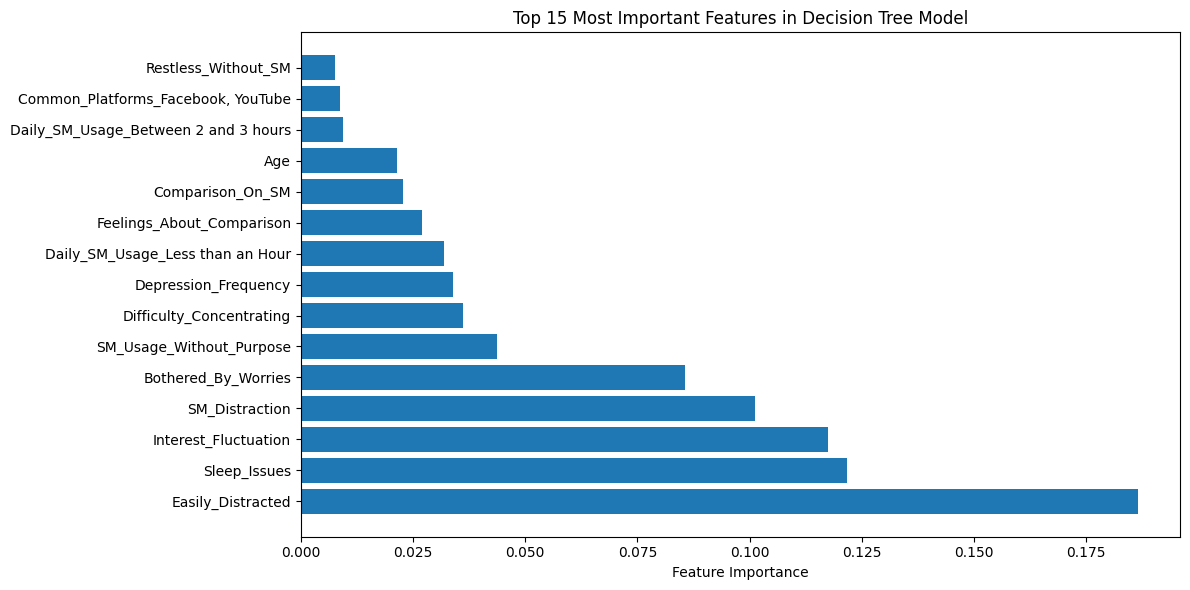

In [22]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Print model performance metrics
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance
feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
feature_importance_dt = feature_importance_dt.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_dt['feature'][:15], feature_importance_dt['importance'][:15])
plt.title('Top 15 Most Important Features in Decision Tree Model')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


# In this section, we'll train a K-Nearest Neighbors (KNN) model to predict mental health status based on social media usage patterns. KNN is a non-parametric method that classifies data points based on the majority class of their k nearest neighbors in the feature space. This approach can be effective for capturing complex relationships in the data without making assumptions about the underlying distribution.



K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.56      0.71      0.62         7
           3       0.86      0.86      0.86        42
           4       0.83      0.85      0.84        34
           5       0.50      0.33      0.40         3

    accuracy                           0.81        91
   macro avg       0.75      0.67      0.69        91
weighted avg       0.82      0.81      0.81        91



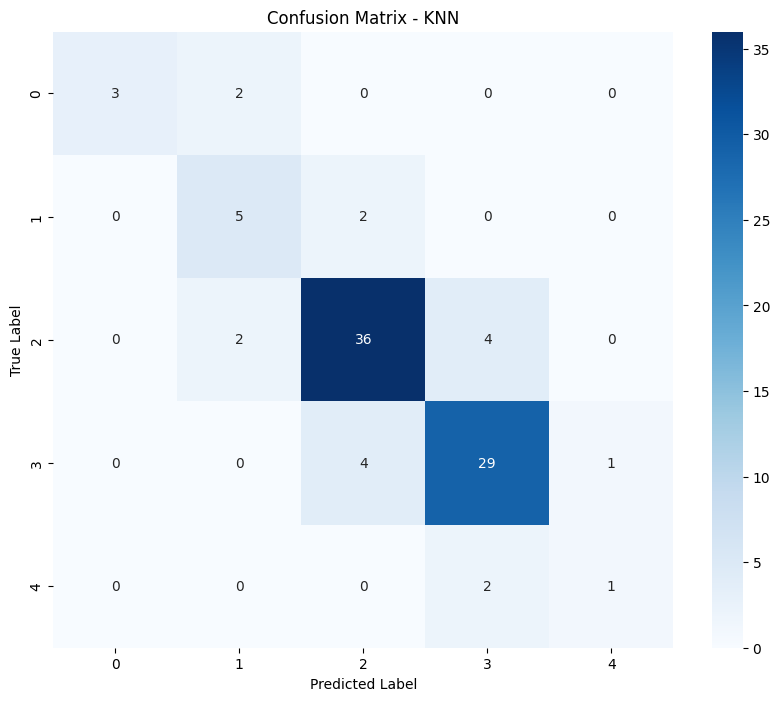

In [23]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Print model performance metrics
print("\nK-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# # Logistic Regression Model
# 
# In this section, we'll train a Logistic Regression model to predict mental health status based on social media usage patterns. Logistic Regression is a statistical method for binary classification that models the probability of a binary outcome based on one or more predictor variables.
# 
# Logistic Regression works by applying the logistic function to a linear combination of features, which transforms the output to a probability between 0 and 1. This makes it well-suited for classification tasks. The model's coefficients can be interpreted as the log-odds of the target variable, providing insights into how each feature affects the prediction.
# 
# We'll evaluate the model's performance using classification metrics and visualize the confusion matrix to understand prediction errors. Additionally, we'll examine feature importance to identify which social media usage patterns are most predictive of mental health status.



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
           2       0.71      0.71      0.71         7
           3       0.95      0.98      0.96        42
           4       0.97      1.00      0.99        34
           5       1.00      0.67      0.80         3

    accuracy                           0.95        91
   macro avg       0.93      0.83      0.87        91
weighted avg       0.95      0.95      0.94        91



f:\ML_ASIF_OWN PROJCET\art=model\Social_Media_Addiction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


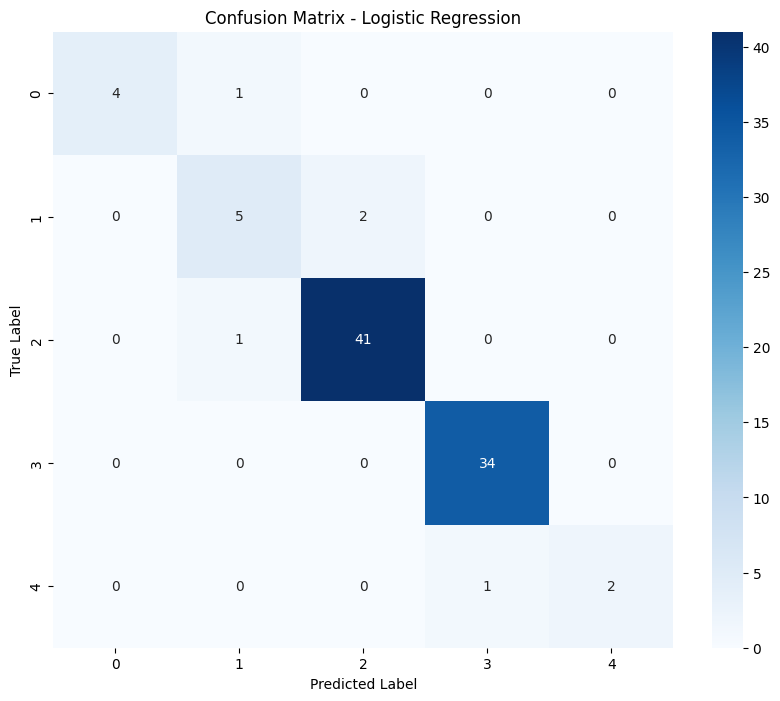

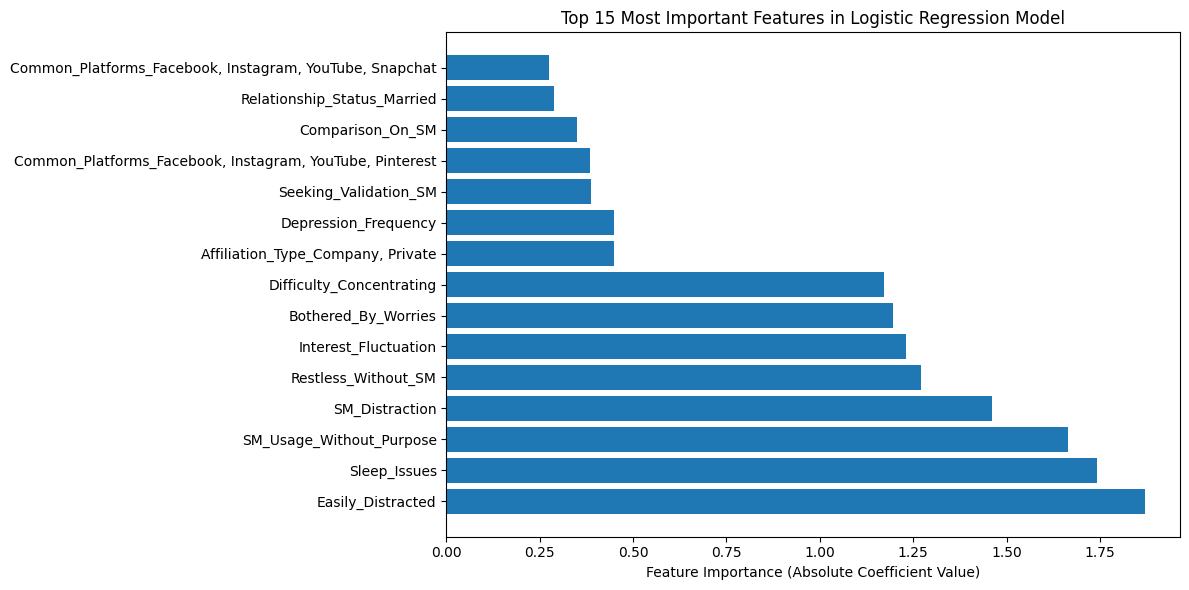

In [24]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Print model performance metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Create confusion matrix
plt.figure(figsize=(10, 8))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Get feature importance for Logistic Regression
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(lr_model.coef_[0])
})
feature_importance_lr = feature_importance_lr.sort_values('importance', ascending=False)

# Plot top 15 most important features
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_lr['feature'][:15], feature_importance_lr['importance'][:15])
plt.title('Top 15 Most Important Features in Logistic Regression Model')
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.tight_layout()
plt.show()


# Save the Model
# 
# In this section, we'll save our trained Logistic Regression model to a file using joblib.
# This allows us to later load the model for making predictions without having to retrain it.
# The model will be saved as 'model.joblib' in the current directory.


In [25]:
# Save the best model (Logistic Regression) and preprocessor
import joblib

# Save the model and preprocessor
joblib.dump(lr_model, 'model.joblib')

print("Model and preprocessor saved successfully!")


Model and preprocessor saved successfully!
